## Import Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

In [28]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('/home/windows/Desktop/DAV_Project/Dataset/diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [29]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [31]:
#overview of data dtype.
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [32]:
diamonds.shape

(53940, 10)

In [33]:
diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [34]:
diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [35]:
diamonds['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

The Gemological Institute of America (GIA) uses the following clarity grades to classify diamonds:

 - Flawless (FL) - no internal or external imperfections visible under 10x magnification.
 - Internally Flawless (IF) - no internal imperfections visible under 10x magnification, but may have very minor external blemishes.
 - Very Very Slightly Included (VVS1/VVS2) - contain minute inclusions that are difficult to see under 10x magnification.
 - Very Slightly Included (VS1/VS2) - contain minor inclusions that are visible under 10x magnification, but are not visible to the naked eye.
 - Slightly Included (SI1/SI2) - contain noticeable inclusions that are visible under 10x magnification and may be visible to the naked eye.
 - Included (I1/I2/I3) - contain obvious inclusions that are visible to the naked eye and may affect the diamond's durability and transparency.


In [36]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric?

Maximum price of diamond :  18823


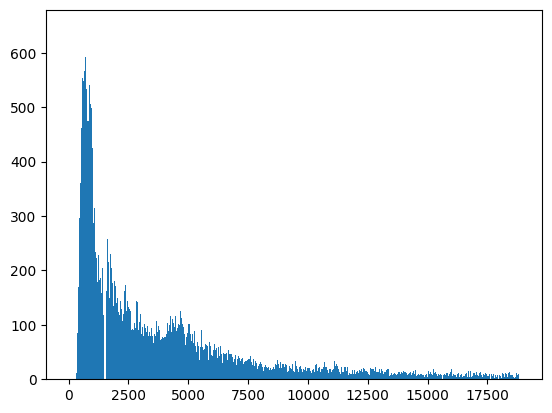

In [37]:
max_price = max(diamonds['price'])
print("Maximum price of diamond : ", max_price)
# "bin_edges" that contains the values 0, 20, 40, 60, ..., up to the maximum value of the "price" column in the 
# "diamonds" dataset plus 20.
bin_edges = np.arange(0 , diamonds['price'].max()+20 , 20)
# "bins" argument specifies that the histogram should be divided into bins with edges at the values specified
# in the "bin_edges" array.
plt.hist(data = diamonds , x = 'price', bins = bin_edges);

## Conclusion : 
#### the majority of the data is concentrated on one side of the distribution, while the other side has very few data points. thus we call it highly right skewed distribution

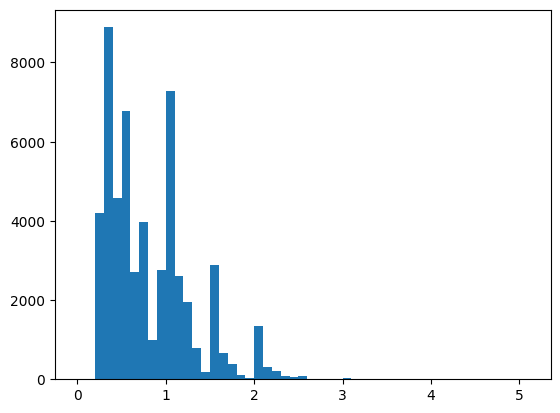

In [38]:
bin_edges = np.arange(0 , diamonds['carat'].max()+0.1 , 0.1)
plt.hist(data = diamonds , x = 'carat', bins = bin_edges);

## Conclusion :
#### Here we had find a interesting pattern in carat weights. where there is a large spike around a single decimal valuee then a gradual tailing off to the right until the next spike,
----------------------------------------------------------------------------------------------------------

### let's move on to exploring the other three 'C' quality measures: cut, color, and clarity.

<Axes: xlabel='cut', ylabel='count'>

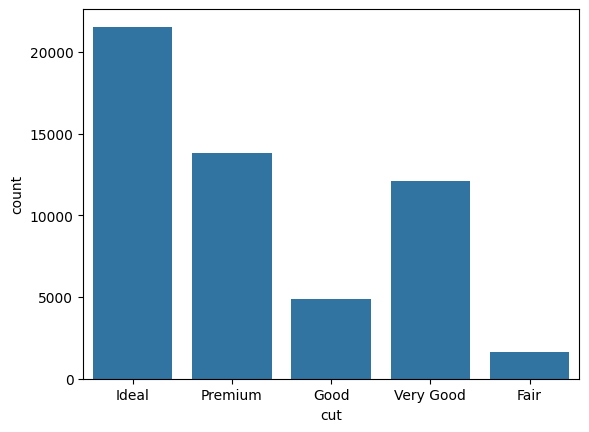

In [39]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'cut', color = base_color )

## Conclusion : 
#### The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade :  Ideal

<Axes: xlabel='clarity', ylabel='count'>

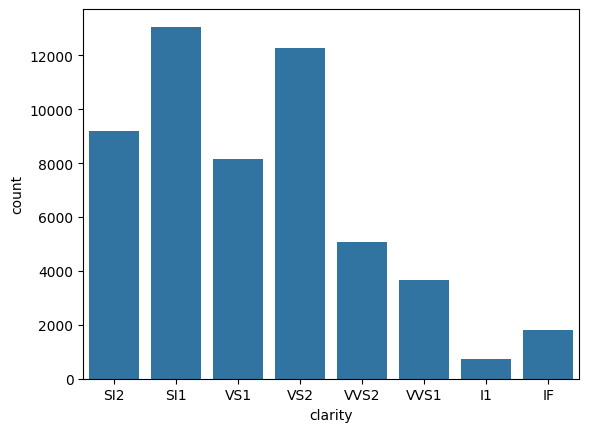

In [40]:
base_color = sb.color_palette()[0]
sb.countplot(data = diamonds , x = 'clarity', color = base_color)

## Conclusion :
#### Here most of the diamonds collected having slight or very slight (internal or external imperfection visible to naked eye.) inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1)

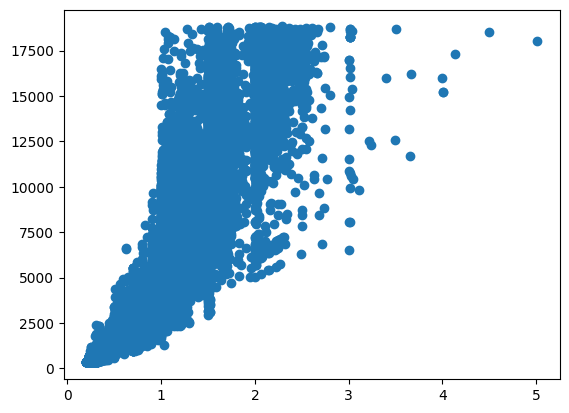

In [41]:
# plot of price vs. carat 
# numeric variable and numeric variable : scatter plot
base_color = sb.color_palette()[0]
plt.scatter(data = diamonds , x = 'carat' , y = 'price')


#### cut : ['Fair','Good','Very Good','Premium','Ideal'] \\
#### color : ['J', 'I', 'H', 'G', 'F', 'E', 'D'] \\
#### clarity : ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ideal'),
  Text(1, 0, 'Premium'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Very Good'),
  Text(4, 0, 'Fair')])

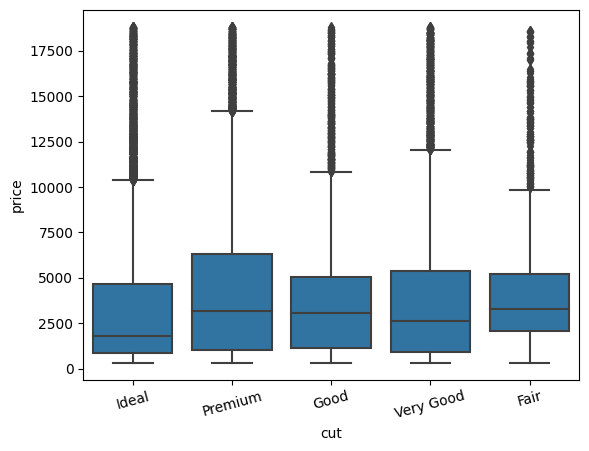

In [42]:
# bivariate plots of price vs. cut, color, clarity
# numeric variable and categorical variable : violin plot or box plot 
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'cut', y='price', color=base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'I'),
  Text(2, 0, 'J'),
  Text(3, 0, 'H'),
  Text(4, 0, 'F'),
  Text(5, 0, 'G'),
  Text(6, 0, 'D')])

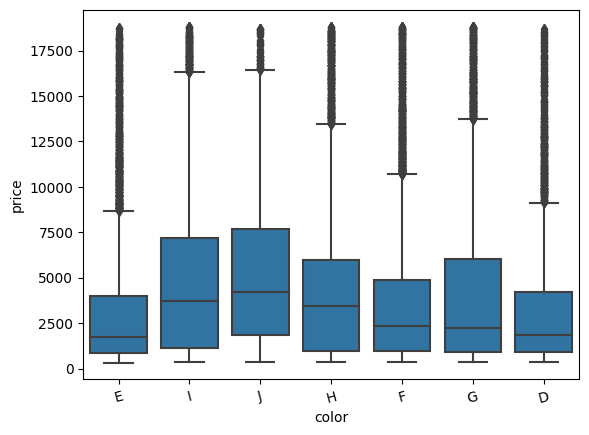

In [43]:
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'color', y='price', color=base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SI2'),
  Text(1, 0, 'SI1'),
  Text(2, 0, 'VS1'),
  Text(3, 0, 'VS2'),
  Text(4, 0, 'VVS2'),
  Text(5, 0, 'VVS1'),
  Text(6, 0, 'I1'),
  Text(7, 0, 'IF')])

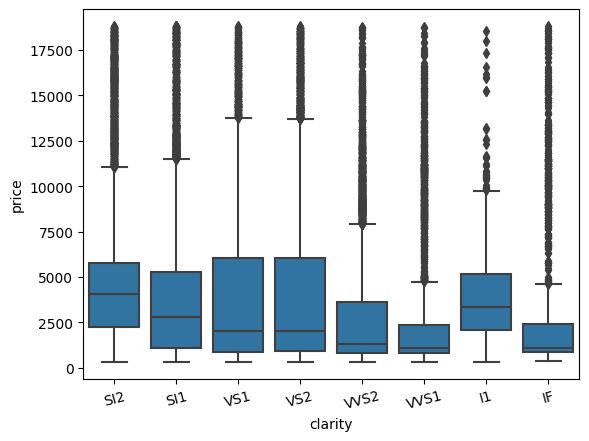

In [44]:
base_color = sb.color_palette()[0]
sb.boxplot(data = diamonds , x = 'clarity', y='price', color=base_color)
plt.xticks(rotation = 15)

## Conclusion : 
#### the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ideal'),
  Text(1, 0, 'Premium'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Very Good'),
  Text(4, 0, 'Fair')])

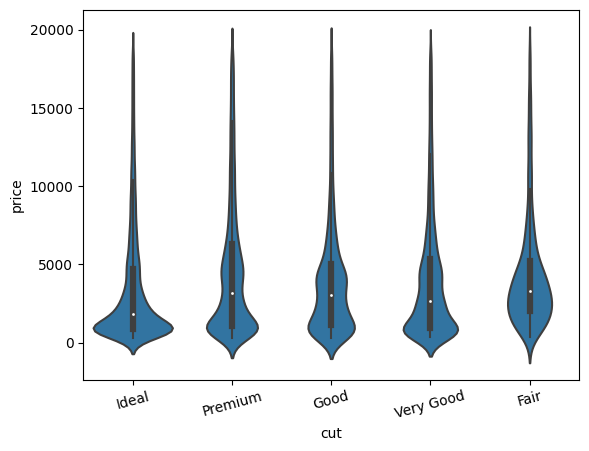

In [45]:
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds , x = 'cut', y='price', color=base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'E'),
  Text(1, 0, 'I'),
  Text(2, 0, 'J'),
  Text(3, 0, 'H'),
  Text(4, 0, 'F'),
  Text(5, 0, 'G'),
  Text(6, 0, 'D')])

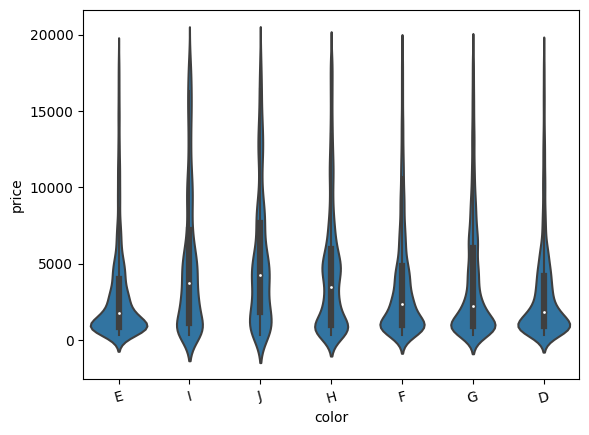

In [46]:
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds , x = 'color', y='price', color=base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SI2'),
  Text(1, 0, 'SI1'),
  Text(2, 0, 'VS1'),
  Text(3, 0, 'VS2'),
  Text(4, 0, 'VVS2'),
  Text(5, 0, 'VVS1'),
  Text(6, 0, 'I1'),
  Text(7, 0, 'IF')])

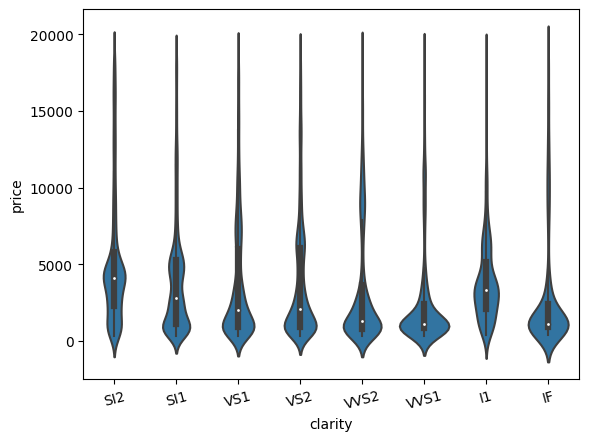

In [47]:
base_color = sb.color_palette()[0]
sb.violinplot(data = diamonds , x = 'clarity', y='price', color=base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SI2'),
  Text(1, 0, 'SI1'),
  Text(2, 0, 'VS1'),
  Text(3, 0, 'VS2'),
  Text(4, 0, 'VVS2'),
  Text(5, 0, 'VVS1'),
  Text(6, 0, 'I1'),
  Text(7, 0, 'IF')])

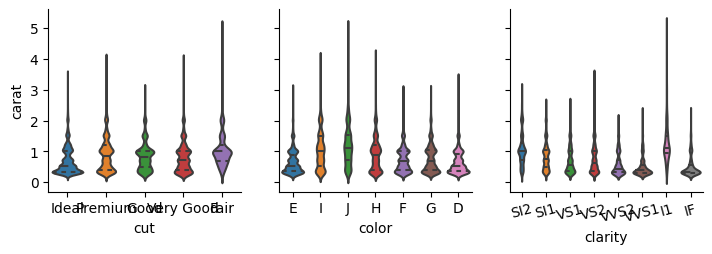

In [48]:
# plots of carat vs. cut, color, clarity
# to see the relationships between the independent variables: matrix plot / pairfacet 
categories = ['cut','color','clarity']
g = sb.PairGrid( data = diamonds , x_vars = categories , y_vars = 'carat')
g.map(sb.violinplot , inner = 'quartile')
plt.xticks(rotation=15)

## Conclusion : 
#### Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price.

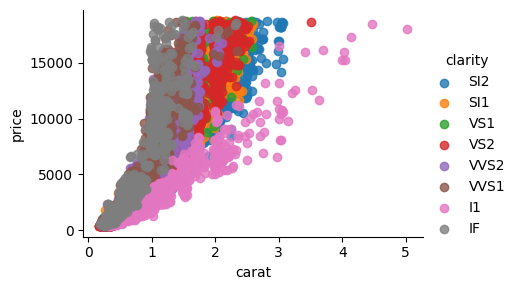

In [49]:
# too much data points causing overplotting, 
# so I chose palette instead of each color for each type like following: 
g = sb.FacetGrid( data = diamonds, hue = 'clarity', aspect=1.5 )
g = g.map(sb.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

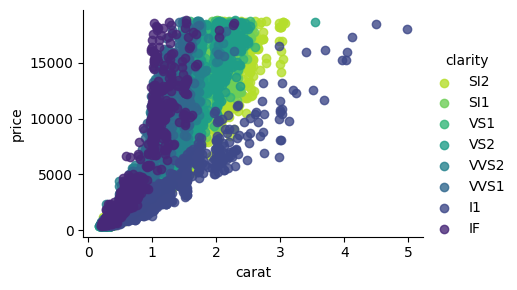

In [50]:
# two numerical vs one Ordinal categorical(clarity)
# too much data points causing overplotting, so I chose palette instead of each color for each type like following:
g = sb.FacetGrid( data = diamonds, hue = 'clarity',aspect=1.5 , palette = 'viridis_r')
g = g.map(sb.regplot, 'carat' ,'price', x_jitter = 0.04 , fit_reg = False);
g.add_legend()
plt.xlabel('carat')
plt.ylabel('price');

## Conclusion : 
#### You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes.

17.177201588281314

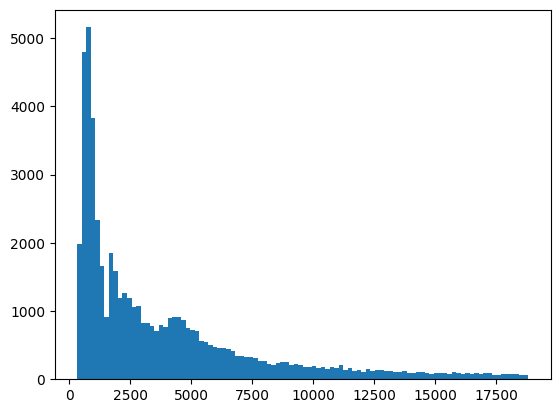

In [51]:
# Whole sample data distribution
_=plt.hist(diamonds['price'],bins=100)
standard_error=np.std(diamonds['price'])/math.sqrt(len(diamonds['price']))
standard_error

3.96706309445936

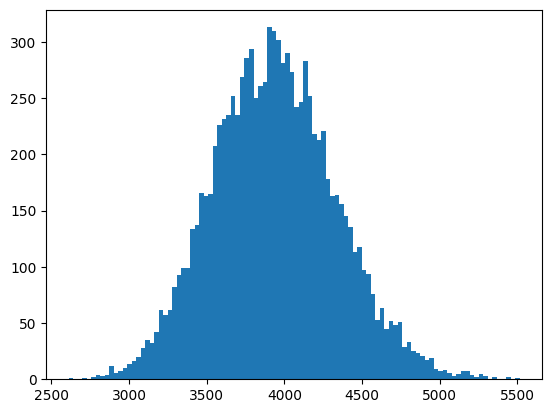

In [52]:
number_of_samples=10000 #R
size_of_sample=100 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(diamonds['price'],size_of_sample,replace=False)))
#sample_mean
_=plt.hist(sample_mean,bins=100)
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
standard_error

In [53]:
CI=0.95
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 3197.19
Upper level : 4753.99


Text(0.5, 0.98, '')

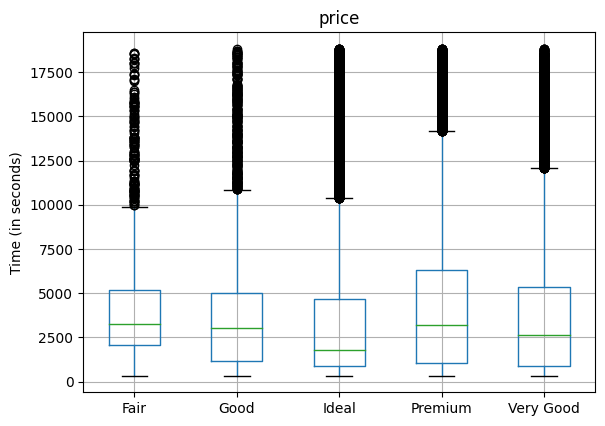

In [57]:
ax = diamonds.boxplot(by='cut', column='price')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

Text(0.5, 0.98, '')

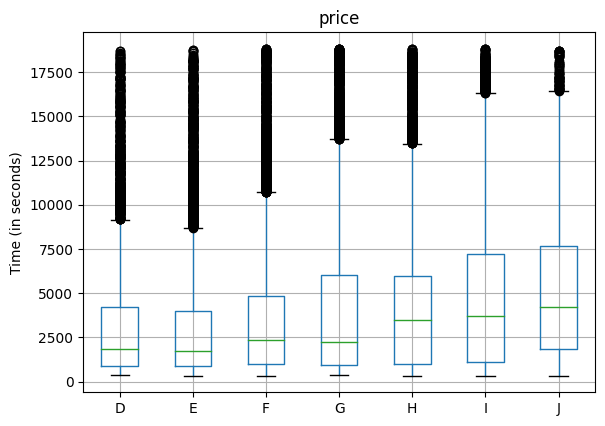

In [60]:
ax = diamonds.boxplot(by='color', column='price')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

Text(0.5, 0.98, '')

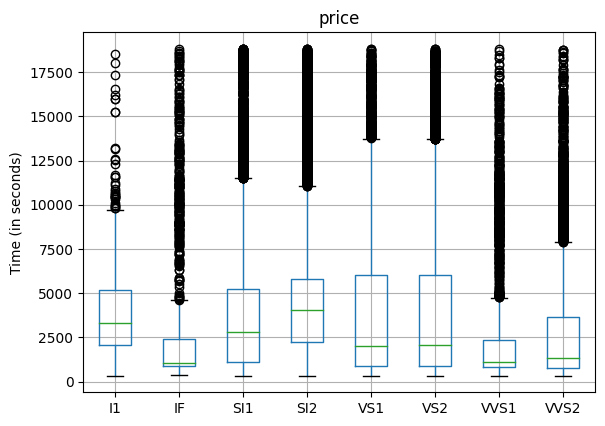

In [61]:
ax = diamonds.boxplot(by='clarity', column='price')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

## Finding the correlation

In [63]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

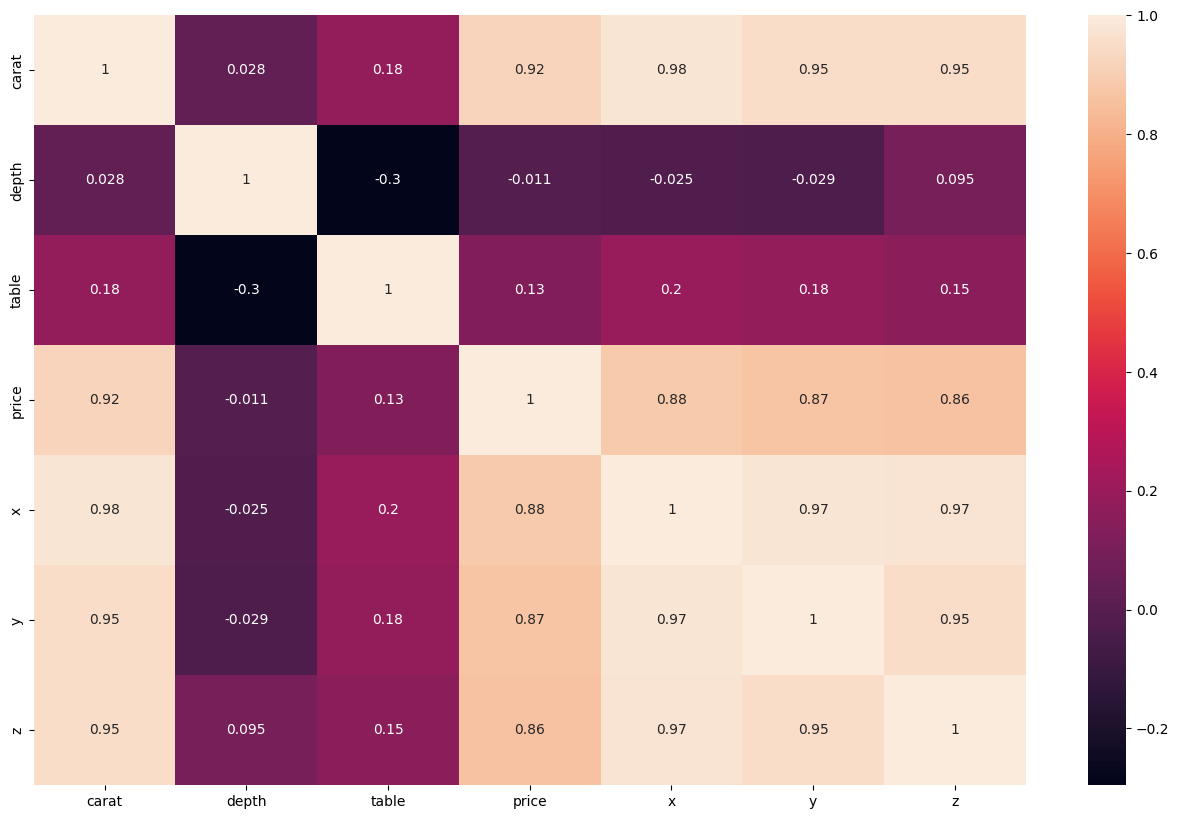

In [65]:
plt.figure(figsize=(16,10))
sb.heatmap(diamonds.corr(),annot=True)

/home/windows/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/windows/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/windows/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/windows/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/windows/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/windows/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1507:

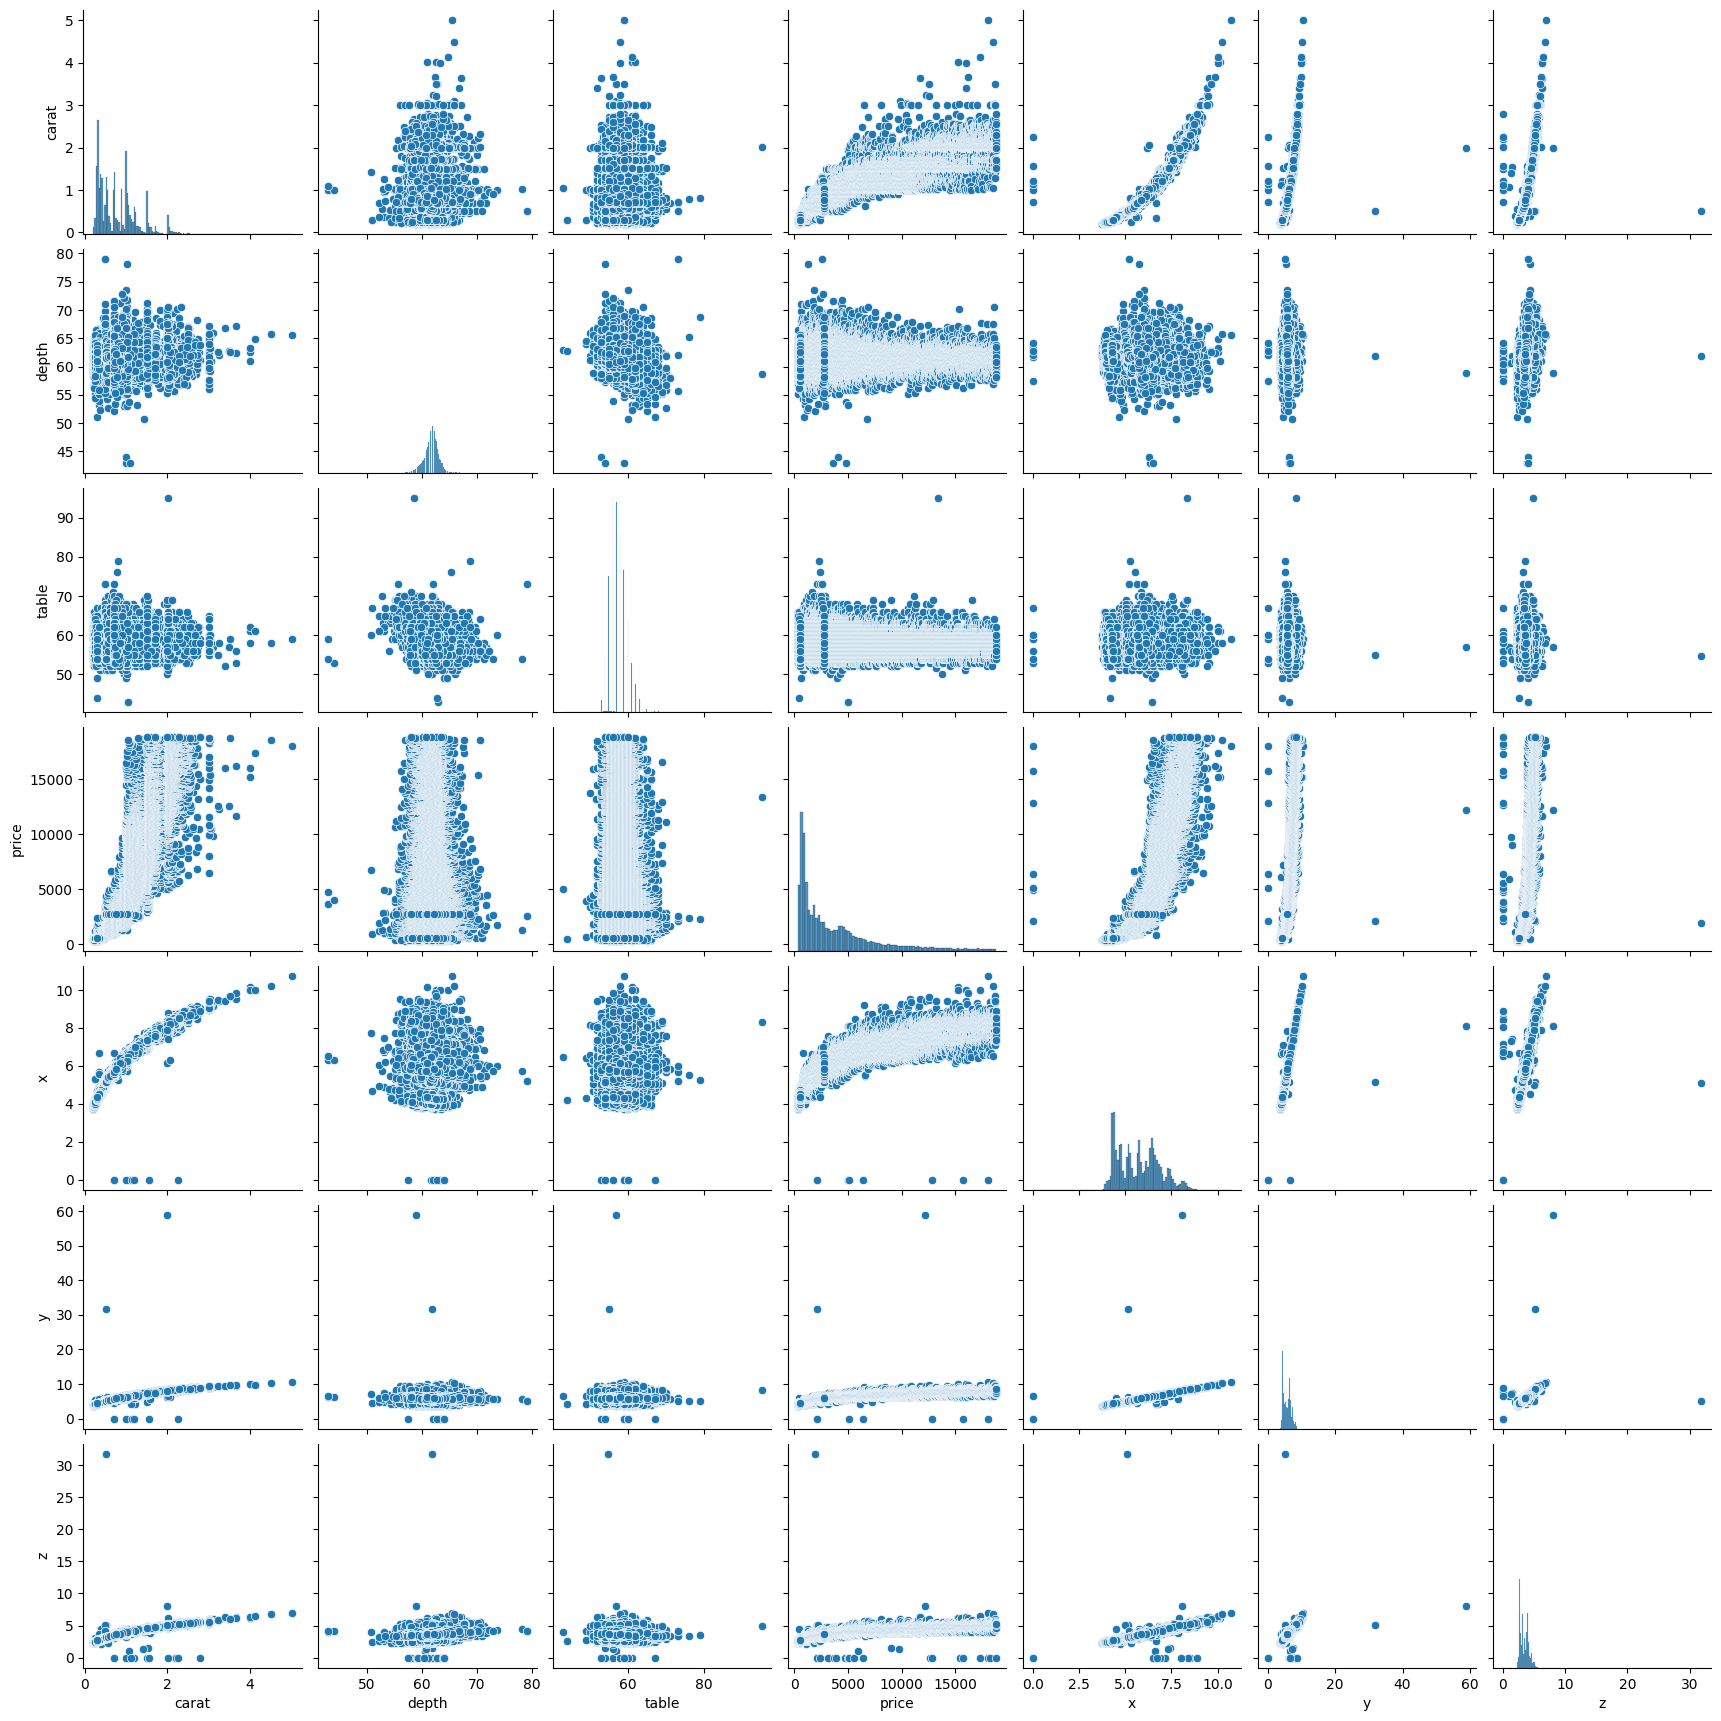

In [62]:
sb.pairplot(data=diamonds, palette='gist_rainbow')
plt.show()